# Series 7 - Support Vector Machines

## Aufgabe 7.1

In [ ]:
import pandas as pd
import numpy as np

# 7.1 a) load an inspect, create a binary target variable

df = pd.read_csv('data/auto.csv')

# convert mpg to binary
mean = df['mpg'].median()
df['mpg1'] = np.where(df['mpg'] > mean, 1, 0)
# drop original mpg and name 
df = df.drop(['mpg','name'], axis=1)

Best cost: 0.05


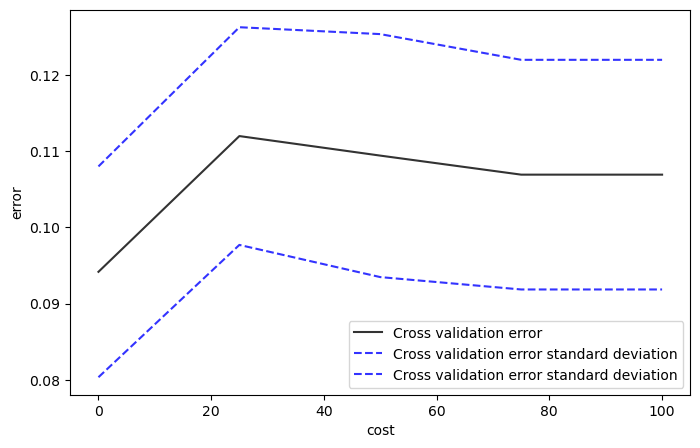

In [5]:
# 7.2 b) fit a svc for various costs

from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Set parameters to be tuned. Other options can be added

x = df.drop('mpg1', axis=1)
y = df['mpg1']


costs = np.linspace(0.05, 100, 5)
tune_parameters = {'C': costs}
n_folds = 10

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='linear'), 
                        tune_parameters,
                        cv=n_folds)

clf_tune.fit(x, y)

# Save Tune scores:
error_tune = 1 - clf_tune.cv_results_['mean_test_score']
error_std = clf_tune.cv_results_['std_test_score'] / np.sqrt(n_folds)

best_cost = clf_tune.best_params_['C']
print(f"Best cost: {best_cost:.2f}")

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(costs, error_tune,
'-k', alpha=0.8, label='Cross validation error')
ax.plot(costs, error_tune + error_std, '--b',
        costs, error_tune - error_std, '--b',
        alpha=0.8, label='Cross validation error standard deviation')

ax.set_xlabel('cost')
ax.set_ylabel('error')
plt.legend()
plt.show()

Best parameter Radial: {'C': 2.875, 'gamma': 0.0005}
Best score Radial: 0.0998


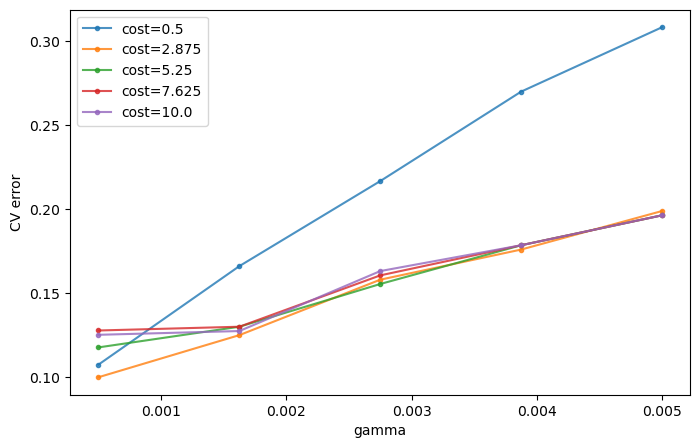

In [17]:
# 7.1 c) fit svm with radial and polynomial kernel
# radial kernel 

costs = np.linspace(0.5, 10, 5)
gamma = np.linspace(0.0005, 0.005, 5)


tune_parameters = {'C': costs,
                   'gamma': gamma}
n_folds = 10

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='rbf'), 
                        tune_parameters,
                        cv=n_folds)

clf_tune.fit(x, y)

# Save Tune scores:
error_tune = 1 - clf_tune.cv_results_['mean_test_score']
error_tune = error_tune.reshape(len(costs), len(gamma))

best_cost = clf_tune.best_params_['C']
best_gamma = clf_tune.best_params_['gamma']

print(f"Best parameter Radial: {clf_tune.best_params_}")
print(f"Best score Radial: {np.round(1 - clf_tune.best_score_, 4):.4f}")

# plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot error vs gamma for each value for cost:
for i in range(len(costs)):
        line, = ax.plot(gamma, error_tune[i, :],'.-', alpha=0.8)
        line.set_label(('cost=' + str(costs[i])))

ax.set_xlabel('gamma')
ax.set_ylabel('CV error')
plt.legend()
plt.show()


Best parameter Polynomial: {'C': 75.125, 'degree': 2},
Best score Polynomial: 0.0996


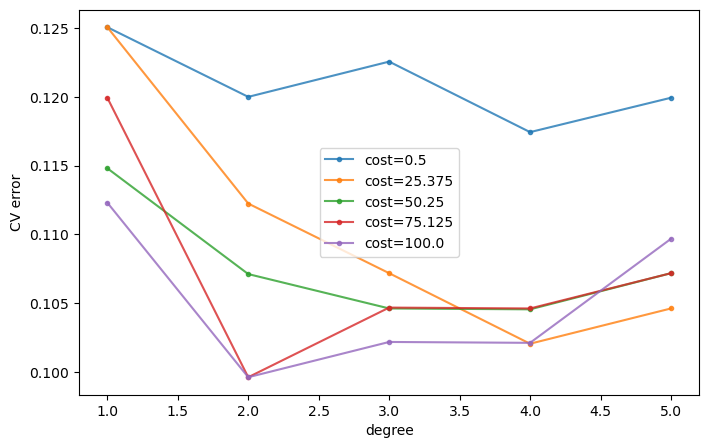

In [18]:
# 7.1 c) fit svm with radial and polynomial kernel
# poly kernel 

costs = np.linspace(0.5, 100, 5)
degree = [1, 2, 3, 4, 5]


tune_parameters = {'C': costs,
                   'degree': degree}
n_folds = 10

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='poly'), 
                        tune_parameters,
                        cv=n_folds)

clf_tune.fit(x, y)

# Save Tune scores:
error_tune = 1 - clf_tune.cv_results_['mean_test_score']
error_tune = error_tune.reshape(len(costs), len(degree))

best_cost = clf_tune.best_params_['C']
best_degree = clf_tune.best_params_['degree']

print(f"Best parameter Polynomial: {clf_tune.best_params_},")
print(f"Best score Polynomial: {np.round(1 - clf_tune.best_score_, 4):.4f}")


# plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot error vs gamma for each value for cost:
for i in range(len(costs)):
        line, = ax.plot(degree, error_tune[i, :],'.-', alpha=0.8)
        line.set_label(('cost=' + str(costs[i])))

ax.set_xlabel('degree')
ax.set_ylabel('CV error')
plt.legend()
plt.show()


## Aufgabe 7.2

In [11]:
# 7.1 load and split into test & train set
import pandas as pd
import numpy as np
from sklearn import svm

df = pd.read_csv('data/OJ.csv')

# fix with dummies
df = pd.get_dummies(df, columns=['Store7'], drop_first=True)
df.head()


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Store7_Yes
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,0
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,0
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,0
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,0
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,1


In [12]:
np.random.seed(1)

i = df.index
# Index of train
i_train = np.random.choice(i, replace=False,size=800)

# Save DataFrames
df_train = df.iloc[i_train]
df_test = df.drop(i_train)

In [13]:
# 7.2 b) fit svc

x_train = df_train.drop('Purchase', axis=1)
y_train = df_train['Purchase']

x_test = df_test.drop('Purchase', axis=1)
y_test = df_test['Purchase']

cost = 0.01
clf = svm.SVC(kernel='linear', C=cost)
clf.fit(x_train, y_train)

print("Classes: ", clf.classes_,
"\nNumber of Support Vectors: ", clf.n_support_)

Classes:  ['CH' 'MM'] 
Number of Support Vectors:  [312 313]


In [14]:
# 7.2 c) train and test error rates + confusion matrix

# train error: 
n = x_train.shape[0] # dataset size
y_pred_train = clf.predict(x_train)
error = n - (y_pred_train == y_train).sum()
train_error = error / n

# test error: 
n = x_test.shape[0] # dataset size
y_pred_test = clf.predict(x_test)
error = n - (y_pred_test == y_test).sum()
test_error = error / n

print(f"Train error: {train_error:.4f}\nTest error: {test_error:.4f}")

confusion_train = pd.DataFrame({'predicted': y_pred_train,'true': y_train})
confusion_train = pd.crosstab(confusion_train.predicted,confusion_train.true,
                             margins=True, margins_name="Sum")

print("\nConfusion Matrix - Test Set:\n", confusion_train)



confusion_test = pd.DataFrame({'predicted': y_pred_test,'true': y_test})
confusion_test = pd.crosstab(confusion_test.predicted,confusion_test.true,
                             margins=True, margins_name="Sum")

print("\nConfusion Matrix - Test Set:\n", confusion_test)

Train error: 0.2175
Test error: 0.2222

Confusion Matrix - Test Set:
 true        CH   MM  Sum
predicted               
CH         432  125  557
MM          49  194  243
Sum        481  319  800

Confusion Matrix - Test Set:
 true        CH  MM  Sum
predicted              
CH         151  39  190
MM          21  59   80
Sum        172  98  270


In [15]:
# 7.2 d) grid search

from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Set parameters to be tuned. Other options can be added

costs = np.linspace(0.01, 10, 10)
tune_parameters = {'C': costs}
n_folds = 10

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='linear', max_iter=1e6,tol=1e-1),
                        tune_parameters,
                        cv=n_folds)

clf_tune.fit(x_train, y_train)

# Save Tune scores:
error_tune = 1 - clf_tune.cv_results_['mean_test_score']
error_std = clf_tune.cv_results_['std_test_score'] / np.sqrt(n_folds) 

best_cost = clf_tune.best_params_['C']
print('Best parameter:', clf_tune.best_params_)
print('Best score:', np.round(1 - clf_tune.best_score_, 4))

c:\Users\justi\anaconda3\envs\FS25_STAT\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\Users\justi\anaconda3\envs\FS25_STAT\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\Users\justi\anaconda3\envs\FS25_STAT\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\Users\justi\anaconda3\envs\FS25_STAT\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-process

Best parameter: {'C': 3.34}
Best score: 0.165


In [17]:
# 7.2 e) Train & Test error 

# train model with best cost
clf = svm.SVC(kernel='linear', C=best_cost)
clf.fit(x_train, y_train)

# train error:
n = x_train.shape[0] # dataset size
train_y_pred = clf.predict( x_train)
train_error = n - (train_y_pred == y_train).sum()
train_error = train_error / n

# test error:
n = x_test.shape[0] # dataset size
test_y_pred = clf.predict( x_test)
test_error = n - (test_y_pred == y_test).sum()
test_error = test_error / n

print(f"Train error with best cost: {train_error:.4f}")
print(f"Test error with best cost: {test_error:.4f}")

Train error with best cost: 0.1562
Test error with best cost: 0.1889


In [21]:
# 7.2 f) fit and test with radial kernel

costs = np.linspace(0.01, 10, 10)
tune_parameters = {'C': costs}
n_folds = 10

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='rbf', max_iter=1e6,tol=1e-1),
                        tune_parameters,
                        cv=n_folds)

clf_tune.fit(x_train, y_train)

# Save Tune scores:
error_tune = 1 - clf_tune.cv_results_['mean_test_score']
error_std = clf_tune.cv_results_['std_test_score'] / np.sqrt(n_folds) 

best_cost = clf_tune.best_params_['C']
print('Best parameter:', clf_tune.best_params_)
print('Best score:', np.round(1 - clf_tune.best_score_, 4))


clf = svm.SVC(kernel='rbf', C=best_cost)
clf.fit(x_train, y_train)

# train error:
n = x_train.shape[0] # dataset size
train_y_pred = clf.predict( x_train)
train_error = n - (train_y_pred == y_train).sum()
train_error = train_error / n

# test error:
n = x_test.shape[0] # dataset size
test_y_pred = clf.predict( x_test)
test_error = n - (test_y_pred == y_test).sum()
test_error = test_error / n

print(f"Train error with best cost: {train_error:.4f}")
print(f"Test error with best cost: {test_error:.4f}")

Best parameter: {'C': 0.01}
Best score: 0.3988
Train error with best cost: 0.3987
Test error with best cost: 0.3630


In [23]:
# 7.2 f) fit and test with poly kernel

costs = np.linspace(0.01, 10, 10)
tune_parameters = {'C': costs}
n_folds = 10

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='poly', max_iter=1e6,tol=1e-1),
                        tune_parameters,
                        cv=n_folds)

clf_tune.fit(x_train, y_train)

# Save Tune scores:
error_tune = 1 - clf_tune.cv_results_['mean_test_score']
error_std = clf_tune.cv_results_['std_test_score'] / np.sqrt(n_folds) 

best_cost = clf_tune.best_params_['C']
print('Best parameter:', clf_tune.best_params_)
print('Best score:', np.round(1 - clf_tune.best_score_, 4))


clf = svm.SVC(kernel='poly', C=best_cost)
clf.fit(x_train, y_train)

# train error:
n = x_train.shape[0] # dataset size
train_y_pred = clf.predict( x_train)
train_error = n - (train_y_pred == y_train).sum()
train_error = train_error / n

# test error:
n = x_test.shape[0] # dataset size
test_y_pred = clf.predict( x_test)
test_error = n - (test_y_pred == y_test).sum()
test_error = test_error / n

print(f"Train error with best cost: {train_error:.4f}")
print(f"Test error with best cost: {test_error:.4f}")

Best parameter: {'C': 0.01}
Best score: 0.3988
Train error with best cost: 0.3987
Test error with best cost: 0.3630
